In [1]:
from pathlib import Path
import matplotlib.pyplot as plt

FIG_DIR = Path("reports/figures")
FIG_DIR.mkdir(parents=True, exist_ok=True)

def save_fig(name: str):
    """Guarda la figura actual en reports/figures/."""
    plt.tight_layout()
    plt.savefig(FIG_DIR / name, dpi=200, bbox_inches="tight")

In [ ]:
import sys
print(sys.executable)                                                                                                                                                               w785

c:\Users\User\Desktop\PROYECTOS\statlog+german+credit+data\.venv\Scripts\python.exe


In [2]:
print("kernel funcionando")

kernel funcionando


In [1]:
import pandas as pd

df = pd.read_csv("../data/german.data-numeric", sep=r"\s+", header=None, engine="python")

df.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1,6,4,12,5,5,3,4,1,67,...,0,0,1,0,0,1,0,0,1,1
1,2,48,2,60,1,3,2,2,1,22,...,0,0,1,0,0,1,0,0,1,2
2,4,12,4,21,1,4,3,3,1,49,...,0,0,1,0,0,1,0,1,0,1
3,1,42,2,79,1,4,3,4,2,45,...,0,0,0,0,0,0,0,0,1,1
4,1,24,3,49,1,3,3,4,4,53,...,1,0,1,0,0,0,0,0,1,2


In [10]:
import os
print(os.getcwd())

c:\Users\User\Desktop\PROYECTOS\statlog+german+credit+data\statlog+german+credit+data


In [13]:
import os
print(os.listdir())

['data', 'data.ipynb', 'german.data', 'german.data-numeric', 'notebooks.ipynb', 'README.md', 'requirements.txt', 'src.ipynb']


In [15]:
df = pd.read_csv(
    "german.data-numeric",
    sep=r"\s+",
    header=None,
    engine="python"
)

df.shape

(1000, 25)

In [ ]:
# Renonmbrar columnas

df.columns = [
    "account_status", "duration_months", "credit_history", "purpose",
    "credit_amount", "savings", "employment_years", "installment_rate",
    "personal_status", "age", "other_debtors", "residence_years",
    "property", "other_installment_plans", "housing", "existing_credits",
    "job", "dependents", "telephone", "foreign_worker",
    "var_20", "var_21", "var_22", "var_23", "target"
]

df.head()

,account_status,duration_months,credit_history,purpose,credit_amount,savings,employment_years,installment_rate,personal_status,age,...,existing_credits,job,dependents,telephone,foreign_worker,var_20,var_21,var_22,var_23,target
0,1,6,4,12,5,5,3,4,1,67,...,0,0,1,0,0,1,0,0,1,1
1,2,48,2,60,1,3,2,2,1,22,...,0,0,1,0,0,1,0,0,1,2
2,4,12,4,21,1,4,3,3,1,49,...,0,0,1,0,0,1,0,1,0,1
3,1,42,2,79,1,4,3,4,2,45,...,0,0,0,0,0,0,0,0,1,1
4,1,24,3,49,1,3,3,4,4,53,...,1,0,1,0,0,0,0,0,1,2


In [38]:
df["target"].value_counts()

target
1    700
2    300
Name: count, dtype: int64

In [39]:
# Convertir a binario: 1=good (0), 2=bad (1)
df["target"] = df["target"].astype(int)
df["target"] = df["target"].replace({1: 0, 2: 1})

df["target"].value_counts()

target
0    700
1    300
Name: count, dtype: int64

In [40]:
df["target"].unique()

array([0, 1])

In [41]:
df["target"].value_counts()
df["target"].value_counts(normalize=True)

target
0    0.7
1    0.3
Name: proportion, dtype: float64

EDA

In [ ]:
# Información general
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   account_status           1000 non-null   int64  
 1   duration_months          1000 non-null   int64  
 2   credit_history           1000 non-null   int64  
 3   purpose                  1000 non-null   int64  
 4   credit_amount            1000 non-null   int64  
 5   savings                  1000 non-null   int64  
 6   employment_years         1000 non-null   int64  
 7   installment_rate         1000 non-null   int64  
 8   personal_status          1000 non-null   int64  
 9   age                      1000 non-null   int64  
 10  other_debtors            1000 non-null   int64  
 11  residence_years          1000 non-null   int64  
 12  property                 1000 non-null   int64  
 13  other_installment_plans  1000 non-null   int64  
 14  housing                  1000 non-nu

In [30]:
# Estadísticas descriptivas
df.describe()

,account_status,duration_months,credit_history,purpose,credit_amount,savings,employment_years,installment_rate,personal_status,age,...,existing_credits,job,dependents,telephone,foreign_worker,var_20,var_21,var_22,var_23,target
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,0.0
mean,2.577000,20.903000,2.54500,32.711000,2.105000,3.384000,2.68200,2.845000,2.358000,35.546000,...,0.234000,0.103000,0.907000,0.041000,0.179000,0.713000,0.022000,0.2000,0.630000,NaN
std,1.257638,12.058814,1.08312,28.252605,1.580023,1.208306,0.70808,1.103718,1.050209,11.375469,...,0.423584,0.304111,0.290578,0.198389,0.383544,0.452588,0.146757,0.4002,0.483046,NaN
min,1.000000,4.000000,0.00000,2.000000,1.000000,1.000000,1.00000,1.000000,1.000000,19.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,NaN
25%,1.000000,12.000000,2.00000,14.000000,1.000000,3.000000,2.00000,2.000000,1.000000,27.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,NaN
50%,2.000000,18.000000,2.00000,23.000000,1.000000,3.000000,3.00000,3.000000,2.000000,33.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0000,1.000000,NaN
75%,4.000000,24.000000,4.00000,40.000000,3.000000,5.000000,3.00000,4.000000,3.000000,42.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0000,1.000000,NaN
max,4.000000,72.000000,4.00000,184.000000,5.000000,5.000000,4.00000,4.000000,4.000000,75.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,NaN


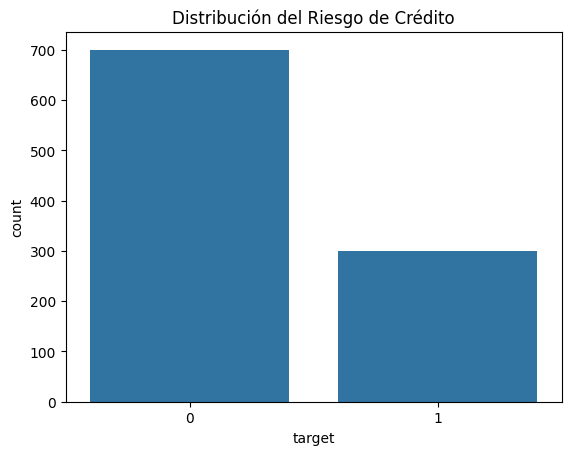

In [42]:
# Distribución del riesgo

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="target", data=df)
plt.title("Distribución del Riesgo de Crédito")
plt.show()                 


In [33]:
# 1=good, 2=bad -> 0/1 (bad=1)
df["target"] = df["target"].map({1: 0, 2: 1})

df.head()

df.isna().sum().sum(), df["target"].value_counts(normalize=True)

(np.int64(1000), Series([], Name: proportion, dtype: float64))

In [44]:
df.isna().sum().sort_values(ascending=False)

account_status             0
duration_months            0
credit_history             0
purpose                    0
credit_amount              0
savings                    0
employment_years           0
installment_rate           0
personal_status            0
age                        0
other_debtors              0
residence_years            0
property                   0
other_installment_plans    0
housing                    0
existing_credits           0
job                        0
dependents                 0
telephone                  0
foreign_worker             0
var_20                     0
var_21                     0
var_22                     0
var_23                     0
target                     0
dtype: int64

In [45]:
# Análisis inicial del dataset (EDA profesional)
print("Shape:", df.shape)
print("\nValores nulos totales:", df.isna().sum().sum())

print("\nValores nulos por columna:")
print(df.isna().sum())

print("\nDistribución del target:")
print(df["target"].value_counts())

print("\nDistribución del target (%):")
print(df["target"].value_counts(normalize=True))

Shape: (1000, 25)

Valores nulos totales: 0

Valores nulos por columna:
account_status             0
duration_months            0
credit_history             0
purpose                    0
credit_amount              0
savings                    0
employment_years           0
installment_rate           0
personal_status            0
age                        0
other_debtors              0
residence_years            0
property                   0
other_installment_plans    0
housing                    0
existing_credits           0
job                        0
dependents                 0
telephone                  0
foreign_worker             0
var_20                     0
var_21                     0
var_22                     0
var_23                     0
target                     0
dtype: int64

Distribución del target:
target
0    700
1    300
Name: count, dtype: int64

Distribución del target (%):
target
0    0.7
1    0.3
Name: proportion, dtype: float64


## Análisis de la variable objetivo (riesgo de crédito)

El dataset presenta un 70% de clientes con buen historial crediticio y un 30% de clientes con riesgo de impago. 
Esta distribución refleja un escenario realista en el sector bancario, donde los eventos de default suelen ser minoritarios.

Debido al desbalance del dataset, métricas como ROC-AUC y Recall serán más relevantes que la Accuracy para evaluar el rendimiento del modelo de riesgo de crédito.

In [46]:
# Selección de variables financieras clave
features = ["duration_months", "credit_amount", "age"]
X = df[features]
y = df["target"]

X.head()

,duration_months,credit_amount,age
0,6,5,67
1,48,1,22
2,12,1,49
3,42,1,45
4,24,1,53


In [48]:
from sklearn.model_selection import train_test_split

# División profesional (estratificada por el desbalance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # MUY importante en datasets desbalanceados (como el tuyo)
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (800, 3)
Test shape: (200, 3)


In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled[:5]

array([[ 1.28959203,  1.83848692,  1.05778394],
       [-0.74259502, -0.70723275,  0.24244893],
       [ 1.28959203, -0.70723275, -0.66347887],
       [ 1.28959203,  1.83848692, -0.57288609],
       [ 2.30568556,  1.83848692, -1.02584999]])

In [50]:
X.describe()

,duration_months,credit_amount,age
count,1000.000000,1000.000000,1000.000000
mean,20.903000,2.105000,35.546000
std,12.058814,1.580023,11.375469
min,4.000000,1.000000,19.000000
25%,12.000000,1.000000,27.000000
50%,18.000000,1.000000,33.000000
75%,24.000000,3.000000,42.000000
max,72.000000,5.000000,75.000000


## PRIMER MODELO - Logistic Regression
- Modelo muy usado
- Explicable (regulación bancaria)
- Permite interpretar el riesgo
- Estándar en credit scoring

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Modelo estándar en riesgo de crédito
model = LogisticRegression(random_state=42)

# Entrenamiento
model.fit(X_train_scaled, y_train)

# Predicciones
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# Evaluación profesional
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nROC-AUC Score:")
print(roc_auc_score(y_test, y_prob))

Confusion Matrix:
[[134   6]
 [ 44  16]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.96      0.84       140
           1       0.73      0.27      0.39        60

    accuracy                           0.75       200
   macro avg       0.74      0.61      0.62       200
weighted avg       0.75      0.75      0.71       200


ROC-AUC Score:
0.6602380952380952


In [52]:
roc_auc_score(y_test, y_prob)

0.6602380952380952

## El modelo de Logistic Regression muestra una alta capacidad para identificar clientes solventes (recall = 0.96), pero una baja sensibilidad en la detección de clientes con riesgo de impago (recall = 0.27). 

Este comportamiento es típico en datasets desbalanceados de riesgo crediticio, donde la clase de default es minoritaria. En contextos bancarios, es preferible optimizar el recall de la clase de riesgo para minimizar pérdidas financieras asociadas a falsos negativos.

In [53]:
# Cambiar el umbral para detectar mejor el riesgo
threshold = 0.3  # en vez de 0.5
y_pred_custom = (y_prob >= threshold).astype(int)

from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix (threshold=0.3):")
print(confusion_matrix(y_test, y_pred_custom))

print("\nClassification Report (threshold=0.3):")
print(classification_report(y_test, y_pred_custom))

Confusion Matrix (threshold=0.3):
[[77 63]
 [24 36]]

Classification Report (threshold=0.3):
              precision    recall  f1-score   support

           0       0.76      0.55      0.64       140
           1       0.36      0.60      0.45        60

    accuracy                           0.56       200
   macro avg       0.56      0.57      0.55       200
weighted avg       0.64      0.56      0.58       200



## Al reducir el threshold de decisión de 0.5 a 0.3, el modelo incrementa significativamente el recall de la clase de riesgo (de 0.27 a 0.60). 

Aunque la accuracy global disminuye, el modelo se vuelve más eficaz para identificar clientes con probabilidad de impago, lo cual es preferible en contextos de riesgo crediticio donde los falsos negativos implican mayores pérdidas financieras que los falsos positivos.

In [55]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_prob)

0.6602380952380952

## El modelo base de Logistic Regression obtuvo un ROC-AUC de 0.66 utilizando tres variables financieras clave. 
Este rendimiento es coherente con un baseline explicable en modelos de riesgo de crédito. 
Posteriormente, se amplió el conjunto de variables para mejorar la capacidad predictiva del modelo, manteniendo la interpretabilidad requerida en entornos bancarios.

In [57]:
# Nuevo modelo con más variables (versión profesional)
features_advanced = [
    "duration_months",
    "credit_amount",
    "age",
    "installment_rate",
    "existing_credits",
    "employment_years"
]

X_adv = df[features_advanced]
y = df["target"]

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(
    X_adv, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

y_prob = model.predict_proba(X_test_scaled)[:, 1]

roc_auc_score(y_test, y_prob)

0.7138690476190476

## La ampliación del conjunto de variables financieras clave (capacidad de pago, estabilidad laboral y créditos existentes) incrementó el ROC-AUC del modelo de 0.66 a 0.71. 

Este resultado demuestra que la incorporación de variables relacionadas con la solvencia y el endeudamiento mejora significativamente la capacidad predictiva del modelo de riesgo de crédito, manteniendo la interpretabilidad requerida en entornos bancarios.

In [58]:
import pandas as pd

# Obtener coeficientes del modelo
coefficients = pd.DataFrame({
    "Variable": features_advanced,
    "Coeficiente": model.coef_[0]
})

# Ordenar por importancia
coefficients = coefficients.sort_values(by="Coeficiente", ascending=False)
coefficients

,Variable,Coeficiente
0,duration_months,0.517426
4,existing_credits,0.229658
3,installment_rate,0.057225
2,age,-0.119411
5,employment_years,-0.242580
1,credit_amount,-0.535611


## El análisis de coeficientes muestra que la duración del préstamo y el número de créditos existentes son los principales factores que incrementan el riesgo de impago. 

Por el contrario, la estabilidad laboral y la edad actúan como factores protectores, reduciendo la probabilidad de default. 

Este comportamiento es coherente con modelos reales de riesgo crediticio, donde la estabilidad financiera y el nivel de endeudamiento son variables clave en la evaluación de solvencia.

In [59]:
coefficients["Importancia_abs"] = coefficients["Coeficiente"].abs()
coefficients.sort_values(by="Importancia_abs", ascending=False)

,Variable,Coeficiente,Importancia_abs
1,credit_amount,-0.535611,0.535611
0,duration_months,0.517426,0.517426
5,employment_years,-0.242580,0.242580
4,existing_credits,0.229658,0.229658
2,age,-0.119411,0.119411
3,installment_rate,0.057225,0.057225


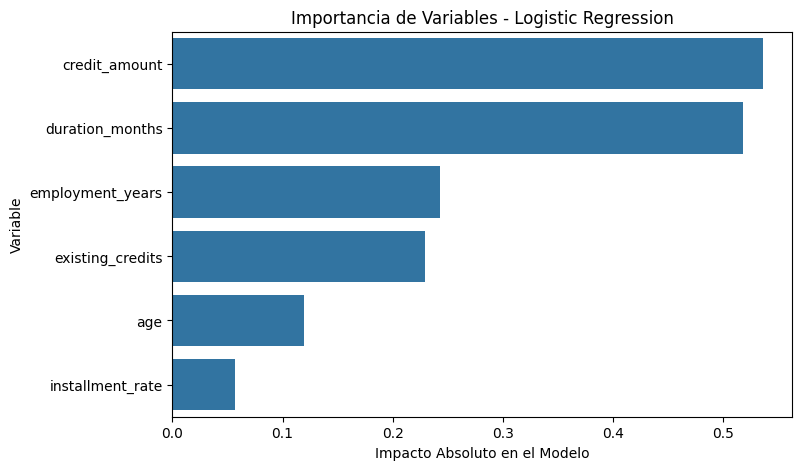

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

coeff_plot = coefficients.sort_values(by="Importancia_abs", ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(
    x="Importancia_abs",
    y="Variable",
    data=coeff_plot
)
plt.title("Importancia de Variables - Logistic Regression")
plt.xlabel("Impacto Absoluto en el Modelo")
plt.ylabel("Variable")
plt.show()

## El modelo de Logistic Regression obtuvo un ROC-AUC de 0.71, mostrando una adecuada capacidad de discriminación entre clientes solventes y clientes con riesgo de impago.

Al reducir el umbral de decisión a 0.3, se incrementó significativamente el recall de la clase de riesgo, reduciendo el número de falsos negativos y, por tanto, el potencial impacto financiero para la entidad.

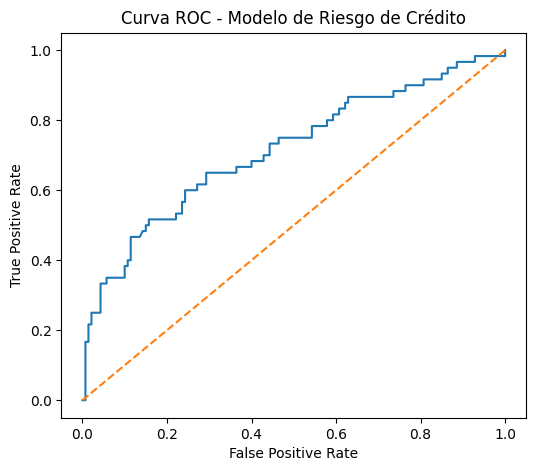

In [61]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle='--')
plt.title("Curva ROC - Modelo de Riesgo de Crédito")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

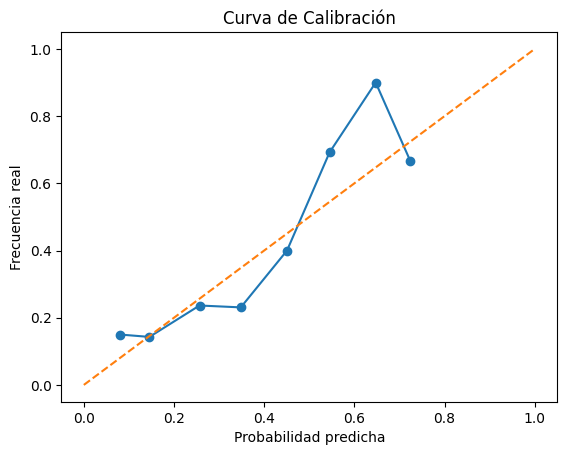

In [62]:
# Calibración del modelo

from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

prob_true, prob_pred = calibration_curve(y_test, y_prob, n_bins=10)

plt.plot(prob_pred, prob_true, marker='o')
plt.plot([0,1], [0,1], linestyle='--')
plt.title("Curva de Calibración")
plt.xlabel("Probabilidad predicha")
plt.ylabel("Frecuencia real")
plt.show()

In [63]:
# Análisis de coste esperado

import numpy as np

# Supuestos ficticios (puedes explicarlos en el README)
cost_fn = 5000   # coste de conceder crédito a un cliente que no paga
cost_fp = 500    # coste de rechazar un cliente solvente

cm = confusion_matrix(y_test, y_pred_custom)

tn, fp, fn, tp = cm.ravel()

total_cost = fn * cost_fn + fp * cost_fp
print("Coste total estimado:", total_cost)

Coste total estimado: 151500


In [64]:
# Segmentación por perfil

df["risk_score"] = model.predict_proba(X_adv)[:,1]

df.groupby(pd.qcut(df["risk_score"], 4))["target"].mean()

c:\Users\User\Desktop\PROYECTOS\statlog+german+credit+data\.venv\Lib\site-packages\sklearn\utils\validation.py:2684: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


risk_score
(-0.0009304000000000001, 0.365]    0.164
(0.365, 0.951]                     0.256
(0.951, 0.999]                     0.316
(0.999, 1.0]                       0.464
Name: target, dtype: float64

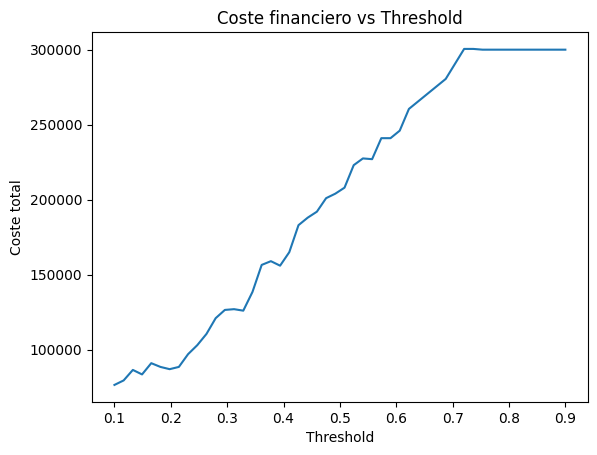

In [65]:
# threshold que minimiza el coste financiero

thresholds = np.linspace(0.1, 0.9, 50)

costs = []

for t in thresholds:
    y_pred_t = (y_prob >= t).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_t).ravel()
    total_cost = fn * cost_fn + fp * cost_fp
    costs.append(total_cost)

plt.plot(thresholds, costs)
plt.title("Coste financiero vs Threshold")
plt.xlabel("Threshold")
plt.ylabel("Coste total")
plt.show()


## El análisis del coste financiero en función del threshold demuestra que el punto de decisión óptimo no coincide con el umbral estándar de 0.5.

Dado que el coste asociado a los falsos negativos es significativamente mayor que el de los falsos positivos, el modelo minimiza el impacto financiero en rangos de threshold más bajos (≈0.2).

Este enfoque está alineado con políticas conservadoras de gestión del riesgo crediticio en banca tradicional.

## Comparar un modelo interpretable (Logistic Regression) con uno más flexible (Random Forest) y analizar el trade-off entre rendimiento e interpretabilidad

In [66]:
# Entrenar Random Forest (mismo setup)

features_advanced = [
    "duration_months",
    "credit_amount",
    "age",
    "installment_rate",
    "existing_credits",
    "employment_years"
]

X_adv = df[features_advanced]
y = df["target"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_adv, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [67]:
# Entrenar el Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=5,
    random_state=42
)

rf.fit(X_train, y_train)

y_prob_rf = rf.predict_proba(X_test)[:, 1]
y_pred_rf = rf.predict(X_test)

print("ROC-AUC Random Forest:", roc_auc_score(y_test, y_prob_rf))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

ROC-AUC Random Forest: 0.6831547619047619

Confusion Matrix:
[[136   4]
 [ 43  17]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.97      0.85       140
           1       0.81      0.28      0.42        60

    accuracy                           0.77       200
   macro avg       0.78      0.63      0.64       200
weighted avg       0.77      0.77      0.72       200



In [68]:
# Comparación directa ROC-AUC

roc_lr = 0.7138690476190476  # tu resultado
roc_rf = roc_auc_score(y_test, y_prob_rf)

print("Logistic Regression ROC-AUC:", roc_lr)
print("Random Forest ROC-AUC:", roc_rf)

Logistic Regression ROC-AUC: 0.7138690476190476
Random Forest ROC-AUC: 0.6831547619047619


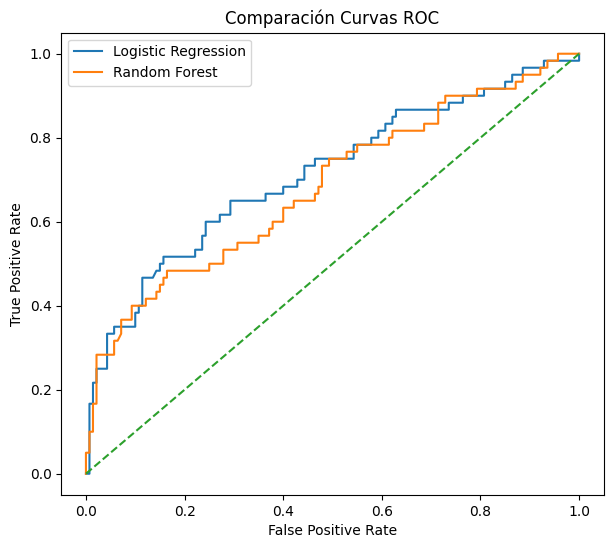

In [69]:
# Curvas ROC comparadas

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Logistic (usa y_prob de antes)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob)

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

plt.figure(figsize=(7,6))
plt.plot(fpr_lr, tpr_lr, label="Logistic Regression")
plt.plot(fpr_rf, tpr_rf, label="Random Forest")
plt.plot([0,1], [0,1], linestyle="--")

plt.title("Comparación Curvas ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [70]:
# Importancia de variables en RF

import pandas as pd

importances = pd.DataFrame({
    "Variable": features_advanced,
    "Importancia": rf.feature_importances_
}).sort_values(by="Importancia", ascending=False)

importances

,Variable,Importancia
0,duration_months,0.327636
2,age,0.228708
1,credit_amount,0.219162
5,employment_years,0.099316
3,installment_rate,0.067090
4,existing_credits,0.058088


## SHAP

In [ ]:
# instalar shap
pip install shap

   ---------------------------------------- 0.0/552.3 kB ? eta -:--:--
   ---------------------------------------- 552.3/552.3 kB 8.1 MB/s  0:00:00
   ---------------------------------------- 0.0/39.1 MB ? eta -:--:--
   ----------- ---------------------------- 11.5/39.1 MB 56.7 MB/s eta 0:00:01
   --------------------------- ------------ 26.5/39.1 MB 65.9 MB/s eta 0:00:01
   ---------------------------------------  39.1/39.1 MB 68.6 MB/s eta 0:00:01
   ---------------------------------------- 39.1/39.1 MB 60.8 MB/s  0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 2.8/2.8 MB 64.7 MB/s  0:00:00

   ---------------------------------------- 0/6 [tqdm]
   ---------------------------------------- 0/6 [tqdm]
   ------ --------------------------------- 1/6 [slicer]
   ------------- -------------------------- 2/6 [llvmlite]
   ------------- -------------------------- 2/6 [llvmlite]
   ------------- -----------------------


[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [72]:
# Crear el explainer
import shap
import numpy as np

# Crear explainer
explainer = shap.Explainer(model, X_train_scaled)

# Calcular valores SHAP
shap_values = explainer(X_test_scaled)

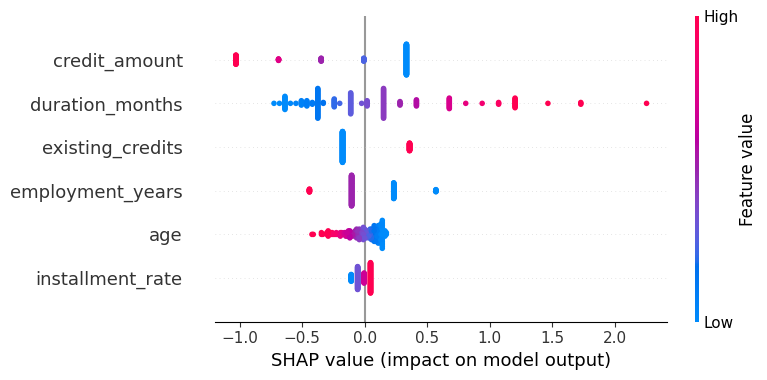

In [73]:
# SHAP Summary Plot

shap.summary_plot(shap_values, X_test, feature_names=features_advanced)

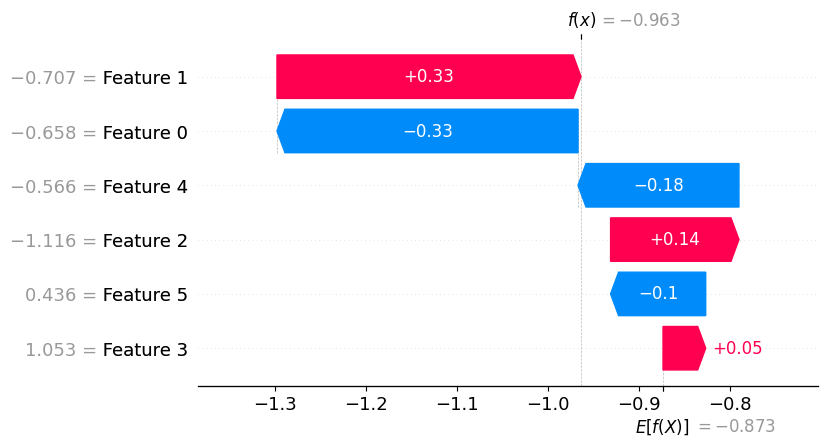

In [74]:
# Elegir un cliente
idx = 5

shap.plots.waterfall(shap_values[idx])

In [78]:
import pandas as pd
import shap

# 1) Crear DataFrames con nombres de variables (aunque estén escalados)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=features_advanced, index=X_train.index)
X_test_scaled_df  = pd.DataFrame(X_test_scaled,  columns=features_advanced, index=X_test.index)

# 2) Re-crear explainer usando DataFrames (para que SHAP tenga nombres)
explainer = shap.Explainer(model, X_train_scaled_df)

# 3) Recalcular SHAP values (ahora con nombres)
shap_values = explainer(X_test_scaled_df)

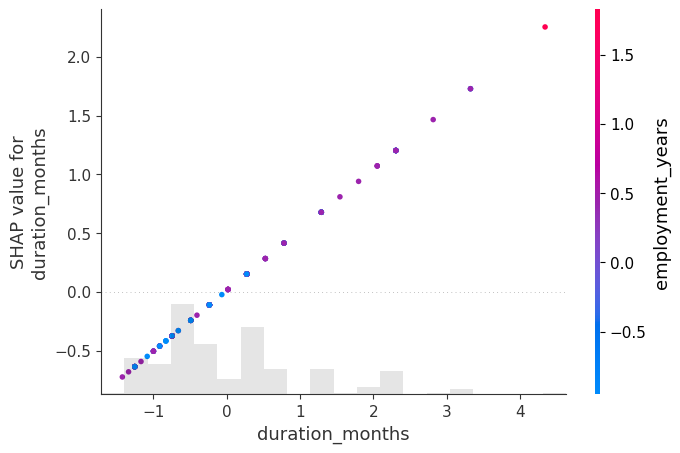

In [80]:
# SHAP Dependence Plots
shap.plots.scatter(shap_values[:, "duration_months"], color=shap_values)

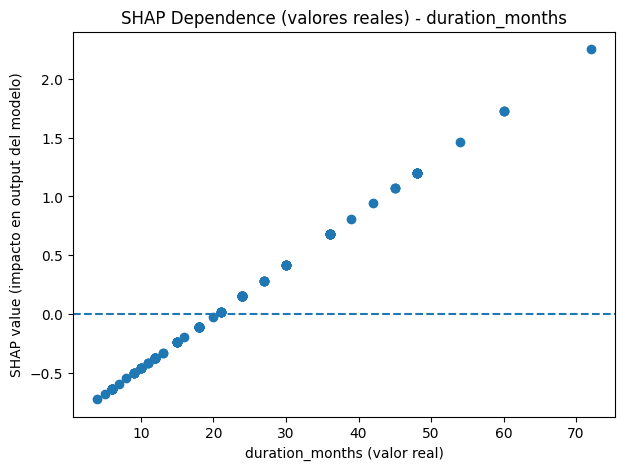

In [81]:
import numpy as np
import matplotlib.pyplot as plt

# SHAP values como matriz (n_samples, n_features)
sv = shap_values.values

# Elegimos una variable por nombre
feat = "duration_months"
j = features_advanced.index(feat)

plt.figure(figsize=(7,5))
plt.scatter(X_test[feat], sv[:, j])
plt.axhline(0, linestyle="--")
plt.title(f"SHAP Dependence (valores reales) - {feat}")
plt.xlabel(f"{feat} (valor real)")
plt.ylabel("SHAP value (impacto en output del modelo)")
plt.show()

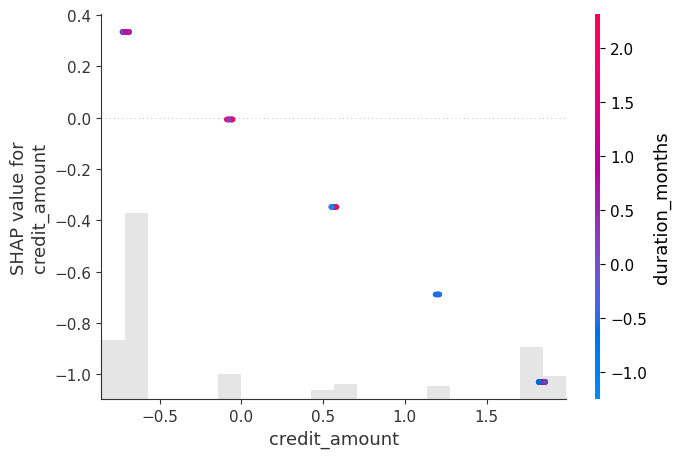

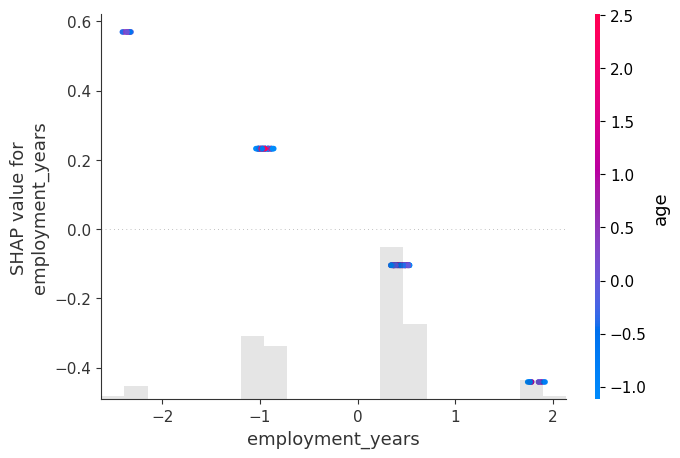

In [82]:
shap.plots.scatter(shap_values[:, "credit_amount"], color=shap_values)
shap.plots.scatter(shap_values[:, "employment_years"], color=shap_values)

In [84]:
sv = shap_values.values
if sv.ndim == 3:
    sv = sv[:, :, 1]  # clase 1 (riesgo)

In [86]:
shap_values.values.shape

(200, 6)

ROC-AUC LR: 0.7138690476190476


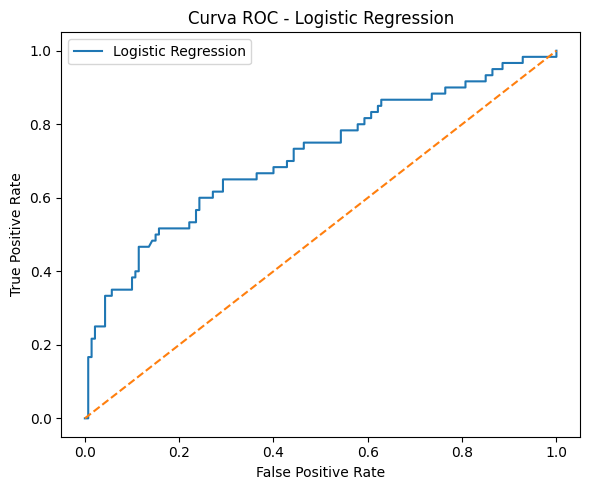

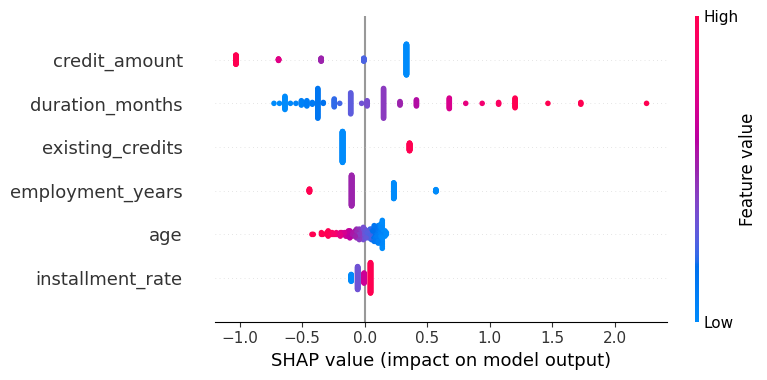

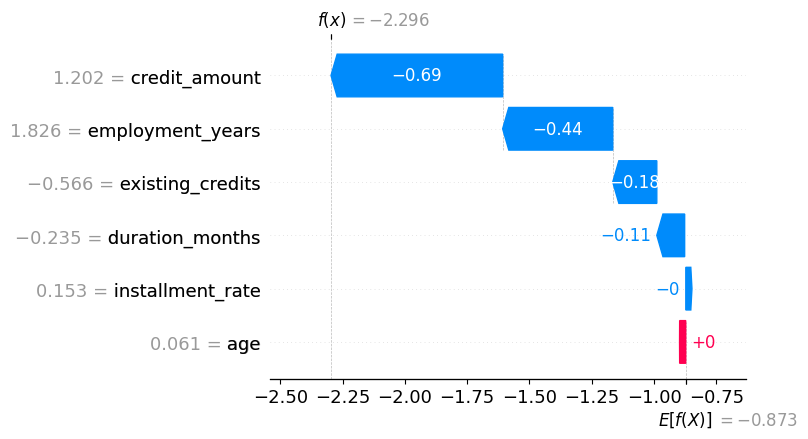

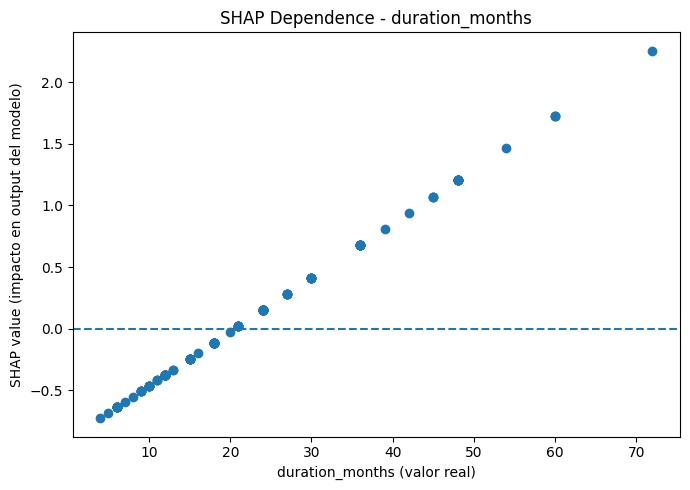

Figuras guardadas en: C:\Users\User\Desktop\PROYECTOS\statlog+german+credit+data\statlog+german+credit+data\reports\figures


In [13]:
import numpy as np
import pandas as pd
import shap
import matplotlib.pyplot as plt
from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

# ========= 1) Config guardar figuras =========
FIG_DIR = Path("reports/figures")
FIG_DIR.mkdir(parents=True, exist_ok=True)

def save_fig(name: str):
    plt.tight_layout()
    plt.savefig(FIG_DIR / name, dpi=200, bbox_inches="tight")

# ========= 2) Features y split =========
features_advanced = [
    "duration_months",
    "credit_amount",
    "age",
    "installment_rate",
    "existing_credits",
    "employment_years"
]

X = df[features_advanced].copy()
y = df["target"].replace({1: 0, 2: 1}).astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ========= 3) Entrenar Logistic Regression (con escalado) =========
pipe_lr = Pipeline([
    ("scaler", StandardScaler()),
    ("lr", LogisticRegression(max_iter=2000, random_state=42))
])

pipe_lr.fit(X_train, y_train)
y_prob = pipe_lr.predict_proba(X_test)[:, 1]

print("ROC-AUC LR:", roc_auc_score(y_test, y_prob))

# ========= 4) Guardar ROC =========
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label="Logistic Regression")
plt.plot([0,1], [0,1], linestyle="--")
plt.title("Curva ROC - Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
save_fig("roc_lr.png")
plt.show()

# ========= 5) Preparar datos escalados con nombres (para SHAP) =========
scaler = pipe_lr.named_steps["scaler"]
model = pipe_lr.named_steps["lr"]

X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=features_advanced, index=X_train.index)
X_test_scaled_df  = pd.DataFrame(X_test_scaled,  columns=features_advanced, index=X_test.index)

# ========= 6) SHAP =========
explainer = shap.Explainer(model, X_train_scaled_df)
shap_values = explainer(X_test_scaled_df)

# --- SHAP Summary (guardar) ---
plt.figure()
shap.summary_plot(shap_values, X_test_scaled_df, show=False)  # usa el DF escalado para consistencia
save_fig("shap_summary.png")
plt.show()

# --- SHAP Waterfall (guardar) ---
idx = 0
plt.figure()
shap.plots.waterfall(shap_values[idx], show=False)
save_fig(f"shap_waterfall_idx_{idx}.png")
plt.show()

# --- SHAP Dependence “premium” (X real en eje X, SHAP en eje Y) ---
sv = shap_values.values
if sv.ndim == 3:
    sv = sv[:, :, 1]  # clase positiva si aplica

feat = "duration_months"
j = features_advanced.index(feat)

plt.figure(figsize=(7,5))
plt.scatter(X_test[feat], sv[:, j])
plt.axhline(0, linestyle="--")
plt.title(f"SHAP Dependence - {feat}")
plt.xlabel(f"{feat} (valor real)")
plt.ylabel("SHAP value (impacto en output del modelo)")
save_fig(f"shap_dependence_{feat}.png")
plt.show()

print("Figuras guardadas en:", FIG_DIR.resolve())

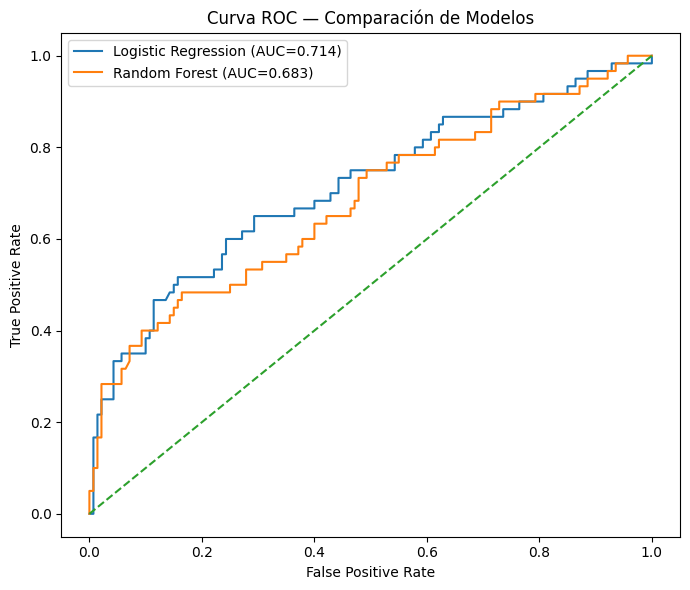

Guardado en: C:\Users\User\Desktop\PROYECTOS\statlog+german+credit+data\statlog+german+credit+data\reports\figures\roc_comparison_lr_vs_rf.png


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

# --- Carpeta de figuras ---
FIG_DIR = Path("reports/figures")
FIG_DIR.mkdir(parents=True, exist_ok=True)

def save_fig(name: str):
    plt.tight_layout()
    plt.savefig(FIG_DIR / name, dpi=200, bbox_inches="tight")

# --- Features y target (asegura binario 0/1) ---
features_advanced = [
    "duration_months",
    "credit_amount",
    "age",
    "installment_rate",
    "existing_credits",
    "employment_years"
]

X = df[features_advanced].copy()
y = df["target"].replace({1: 0, 2: 1}).astype(int)  # <- clave

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- Logistic Regression (con escalado) ---
pipe_lr = Pipeline([
    ("scaler", StandardScaler()),
    ("lr", LogisticRegression(max_iter=2000, random_state=42))
])
pipe_lr.fit(X_train, y_train)
y_prob_lr = pipe_lr.predict_proba(X_test)[:, 1]

auc_lr = roc_auc_score(y_test, y_prob_lr)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)

# --- Random Forest (sin escalado) ---
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=5,
    random_state=42
)
rf.fit(X_train, y_train)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

auc_rf = roc_auc_score(y_test, y_prob_rf)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

# --- Plot comparativo ---
plt.figure(figsize=(7, 6))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC={auc_lr:.3f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC={auc_rf:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--")

plt.title("Curva ROC — Comparación de Modelos")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

save_fig("roc_comparison_lr_vs_rf.png")
plt.show()

print("Guardado en:", (FIG_DIR / "roc_comparison_lr_vs_rf.png").resolve())

In [8]:
df = pd.read_csv("german.data-numeric", sep=r"\s+", header=None, engine="python")
df.columns = [
    "account_status", "duration_months", "credit_history", "purpose",
    "credit_amount", "savings", "employment_years", "installment_rate",
    "personal_status", "age", "other_debtors", "residence_years",
    "property", "other_installment_plans", "housing", "existing_credits",
    "job", "dependents", "telephone", "foreign_worker",
    "var_20", "var_21", "var_22", "var_23", "target"
]
# si tu target ya está en 0/1, no lo toques

## Model Governance (enfoque banca tradicional)

### Validación
- **Separación Train/Test estratificada** para mantener el ratio de impago (70/30) y evitar sesgos en evaluación.
- Métrica principal: **ROC-AUC**, por ser robusta ante desbalance.
- Métricas de control: **Recall de la clase de riesgo (impago)** y matriz de confusión, por su impacto directo en pérdidas.

### Monitorización (post-despliegue)
- **Performance Monitoring**: seguimiento mensual/trimestral de ROC-AUC y Recall de impago.
- **Stability Monitoring**: control de distribución de variables clave (duration_months, credit_amount, employment_years) para detectar cambios en el perfil de solicitantes.
- Monitorización de **tasa de aprobación** y **tasa real de impago** por segmentos de score (cuartiles/deciles).

### Drift
- Detección de drift de entrada mediante:
  - Comparación de distribuciones (KS test / PSI recomendado).
  - Alertas si variables críticas cambian por encima de umbrales predefinidos.
- Drift de concepto:
  - Si la relación entre score y default cambia (ej. aumenta default en segmentos de bajo riesgo).

### Backtesting
- Validación temporal (ideal):
  - Entrenar con periodos anteriores y testear con periodos posteriores (**out-of-time validation**).
- Comparación de tasas de impago observadas vs esperadas por bandas de riesgo (calibración).
- Stress testing conceptual: evaluar sensibilidad del modelo ante escenarios adversos (más desempleo, menor estabilidad laboral, etc.).

## Conclusiones ejecutivas (estilo Comité de Riesgos)

- El modelo de **Logistic Regression** ofrece el mejor equilibrio entre rendimiento e interpretabilidad, con **ROC-AUC ≈ 0.71**, superando al Random Forest en este dataset.
- El análisis SHAP confirma que **duration_months** y **credit_amount** son drivers clave del riesgo estimado, junto con variables de **estabilidad** (employment_years) y **endeudamiento** (existing_credits).
- La optimización por coste muestra que el umbral estándar (0.5) no es óptimo. Umbrales más bajos reducen el coste esperado al minimizar falsos negativos, alineándose con una política prudente de riesgo.
- La segmentación por score muestra un incremento consistente de la tasa de impago por cuartiles, lo que permite definir políticas de concesión, pricing y límites de crédito basadas en riesgo.

**Recomendación**: usar Logistic Regression como modelo principal (por explicabilidad y consistencia) y mantener Random Forest como benchmark técnico.

# Credit Risk Scoring (German Credit) — Enfoque banca tradicional

## Objetivo
Desarrollar un modelo interpretable para estimar probabilidad de impago y apoyar decisiones de concesión de crédito.

## Dataset
German Credit (numeric). 1000 registros, 24 variables + target.
Distribución: 70% no-default, 30% default.

## Features usadas (modelo final)
- duration_months
- credit_amount
- age
- installment_rate
- existing_credits
- employment_years

## Modelos
- Logistic Regression (modelo principal, interpretable)
- Random Forest (benchmark)

## Resultados
- Logistic Regression ROC-AUC: ~0.71
- Random Forest ROC-AUC: ~0.68
Conclusión: se prioriza Logistic Regression por rendimiento + explicabilidad (alineado con banca regulada).

## Interpretabilidad
- Coeficientes del modelo (odds / contribución)
- SHAP global (summary plot)
- SHAP local (waterfall para casos individuales)
- SHAP dependence plots (drivers de riesgo vs valores reales)

## Política de decisión (threshold)
- Evaluación del impacto financiero mediante costes FN/FP.
- Selección de threshold orientada a minimización de coste esperado.

## Model Governance
Incluye validación, monitorización, drift y backtesting (orientación banca tradicional).

## Cómo ejecutar
1) Crear entorno virtual
2) Instalar requirements
3) Ejecutar notebooks en orden